# 붓꽃(Iris) 데이터셋 시각화 노트북 🌸

이 노트북은 기본적인 공공 데이터셋(Iris)을 사용하여 데이터 시각화를 수행하는 과정을 보여줍니다. Pandas, Matplotlib, Seaborn 라이브러리를 활용하여 데이터의 특징을 탐색하고 시각적으로 표현하는 기본적인 단계를 다룹니다.

## 붓꽃(Iris) 데이터셋이란?

붓꽃(Iris) 데이터셋은 통계학자 로널드 피셔(Ronald Fisher)가 1936년에 소개한 다변량 데이터셋으로, 머신러닝과 통계학 분야에서 가장 널리 사용되는 데이터셋 중 하나입니다. 특히 분류(Classification) 문제와 데이터 시각화 예제로 자주 활용됩니다.

**데이터 구성:**

*   **샘플 수:** 총 150개의 붓꽃 샘플 데이터
*   **품종(Species):** 3가지 종류의 붓꽃 품종(Setosa, Versicolor, Virginica) 각각 50개씩 포함
*   **특성(Features):** 각 샘플에 대해 4가지 특성(수치형 데이터)을 측정
    1.  **꽃받침 길이 (Sepal Length):** cm 단위
    2.  **꽃받침 너비 (Sepal Width):** cm 단위
    3.  **꽃잎 길이 (Petal Length):** cm 단위
    4.  **꽃잎 너비 (Petal Width):** cm 단위

**활용 목적:**

이 데이터셋은 주로 4가지 특성(꽃받침/꽃잎의 길이/너비)을 이용하여 붓꽃의 품종을 예측하거나, 각 품종별 특성 분포를 시각화하고 비교하는 데 사용됩니다. 데이터 분석 및 시각화 라이브러리(Pandas, Matplotlib, Seaborn 등)의 사용법을 익히는 데 매우 유용한 데이터셋입니다.

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정 (선택 사항)
sns.set(style="ticks")

# Jupyter Notebook 환경에서 그래프를 바로 볼 수 있도록 설정
%matplotlib inline

# 한글 폰트 설정 (Windows 사용자 예시 - 환경에 맞게 수정 필요)
# plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] =False # 마이너스 부호 깨짐 방지

print("라이브러리 로딩 완료.")

라이브러리 로딩 완료.


## 1. 데이터 로드 및 기본 정보 확인

Seaborn 라이브러리에 내장된 Iris 데이터셋을 로드하고, 데이터의 처음 몇 행과 기본적인 정보를 확인하여 데이터 구조를 파악합니다.

In [2]:
# Iris 데이터셋 로드
iris = sns.load_dataset('iris')

# 데이터 앞부분 확인
print("데이터 샘플 (처음 5개 행):")
print(iris.head())

# 데이터 기본 정보 확인 (컬럼명, 데이터 타입, Non-null 개수)
print("\n데이터 기본 정보:")
iris.info()

# 데이터 기술 통계량 확인 (수치형 데이터 요약)
print("\n데이터 기술 통계:")
print(iris.describe())

데이터 샘플 (처음 5개 행):
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

데이터 기술 통계:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.0000

## ✨ 한글 폰트 설정

Matplotlib 시각화에서 한글이 깨지는 문제를 해결하기 위해 시스템에 설치된 한글 폰트(예: 나눔고딕, 맑은 고딕)를 설정하고, 마이너스 기호가 깨지지 않도록 설정합니다.

**중요:** 위 코드 셀 실행 후, 변경사항을 완전히 적용하기 위해 **Jupyter Notebook의 '커널' 메뉴에서 '커널 다시 시작'**을 선택해야 할 수 있습니다. 커널 재시작 후 이 셀부터 다시 실행하여 폰트 설정을 적용한 뒤, 이후 시각화 셀들을 실행하세요.

In [3]:
import os
import subprocess
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import glob

# --- 설정 ---
font_name = 'NanumGothic'  # 설치 및 설정할 폰트 이름

# --- OS 확인 ---
if platform.system() != "Linux":
    print(f"자동 설치는 Linux (Debian/Ubuntu 계열) 환경에서만 지원됩니다. 현재 OS: {platform.system()}")
    # 다른 OS에 대한 기본 설정 시도 (예: Windows, macOS) - 필요시 주석 해제
    # elif platform.system() == "Windows": font_name = 'Malgun Gothic'
    # elif platform.system() == "Darwin": font_name = 'AppleGothic'
    # plt.rc('font', family=font_name)
    # plt.rc('axes', unicode_minus=False)
    # print(f"기본 폰트를 '{font_name}'(으)로 설정 시도합니다.")
else:
    # --- Linux 환경: 자동 설치 및 설정 로직 ---
    font_installed = False
    try:
        # 1. Matplotlib에서 폰트 사용 가능한지 먼저 확인
        fm.findfont(fm.FontProperties(family=font_name), fallback_to_default=False)
        print(f"'{font_name}' 폰트가 이미 Matplotlib에서 사용 가능합니다.")
        font_installed = True
    except ValueError:
        print(f"'{font_name}' 폰트를 Matplotlib에서 찾을 수 없습니다. 설치를 시도합니다.")

        # 2. 폰트 설치 시도
        try:
            print("apt 패키지 목록 업데이트 중...")
            update_cmd = ["sudo", "apt-get", "update", "-qq"]
            subprocess.run(update_cmd, check=True, capture_output=True) # check=True는 오류 시 예외 발생

            print(f"'{font_name}' 관련 폰트 설치 중... (sudo 권한 필요)")
            install_cmd = ["sudo", "apt-get", "install", "-y", "fonts-nanum*", "-qq"]
            result = subprocess.run(install_cmd, check=True, capture_output=True, text=True)
            print("폰트 설치 명령 완료.")

            # 3. 시스템 폰트 캐시 업데이트
            print("시스템 폰트 캐시 업데이트 중... (fc-cache)")
            cache_cmd = ["sudo", "fc-cache", "-fv"]
            subprocess.run(cache_cmd, check=True, capture_output=True)
            print("시스템 폰트 캐시 업데이트 완료.")

            # 4. Matplotlib 폰트 캐시 삭제 (커널 재시작 후 재생성 유도)
            try:
                cache_dir = matplotlib.get_cachedir()
                print(f"Matplotlib 캐시 디렉토리: {cache_dir}")
                # fontlist-vxxx.json 형태의 파일 삭제
                cache_files = glob.glob(os.path.join(cache_dir, 'fontlist-*.json'))
                if not cache_files:
                     print("Matplotlib 캐시 파일을 찾을 수 없습니다. (이미 삭제되었거나 다른 위치일 수 있음)")
                else:
                    for f in cache_files:
                         try:
                             os.remove(f)
                             print(f"삭제된 Matplotlib 캐시 파일: {f}")
                         except OSError as e:
                             print(f"캐시 파일 삭제 중 오류 ({f}): {e}")
            except Exception as e:
                 print(f"Matplotlib 캐시 처리 중 오류: {e}")


            print("\n[★★★★★ 중요 ★★★★★]")
            print("폰트 설치 및 캐시 정리가 완료되었습니다.")
            print("Matplotlib이 새 폰트를 인식하려면 **반드시 커널을 재시작**해야 합니다.")
            print("노트북 상단의 '커널(Kernel)' 메뉴 -> '커널 다시 시작(Restart Kernel)'을 선택한 후,")
            print("이 셀을 다시 실행해주세요.")
            print("----------------------")

        except subprocess.CalledProcessError as e:
            print(f"\n[오류] 폰트 설치 또는 캐시 업데이트 중 오류 발생:")
            print(f"  - 명령어: {' '.join(e.cmd)}")
            print(f"  - 반환 코드: {e.returncode}")
            print(f"  - 출력: {e.stderr or e.stdout}")
            print("  - sudo 권한 문제 또는 네트워크 연결을 확인하세요.")
        except FileNotFoundError as e:
             print(f"\n[오류] 필요한 명령어(예: sudo, apt-get, fc-cache)를 찾을 수 없습니다: {e}")
             print("  - Debian/Ubuntu 기반 Linux 환경이 맞는지 확인하세요.")
        except Exception as e:
            print(f"\n[오류] 예기치 않은 오류 발생: {e}")

    # 5. Matplotlib 폰트 설정 적용 (폰트가 이미 있거나, 설치 후 커널 재시작된 경우)
    if font_installed:
        try:
            plt.rc('font', family=font_name)
            plt.rc('axes', unicode_minus=False)
            print(f"\n[성공] Matplotlib 기본 폰트를 '{font_name}'(으)로 설정했습니다.")
            print("        마이너스(-) 기호 깨짐 방지 설정도 적용되었습니다.")
        except Exception as e:
            print(f"\n[오류] '{font_name}' 폰트 적용 중 문제가 발생했습니다: {e}")

# --- 이후 시각화 코드 실행 ---
# (커널 재시작 및 이 셀 재실행 후)
# 예: plt.figure(); plt.plot([1, 2], [3, 4]); plt.title('한글 제목 테스트'); plt.show()


'NanumGothic' 폰트가 이미 Matplotlib에서 사용 가능합니다.

[성공] Matplotlib 기본 폰트를 'NanumGothic'(으)로 설정했습니다.
        마이너스(-) 기호 깨짐 방지 설정도 적용되었습니다.


## 2. 기본 데이터 시각화

이제 로드된 데이터를 사용하여 몇 가지 기본적인 시각화를 진행합니다.

*   **Pairplot:** 데이터셋 내 모든 수치형 변수 간의 관계를 한눈에 보여줍니다. 품종(species) 별로 색상을 다르게 하여 분포를 더 명확하게 구분합니다.
*   **Histogram:** 각 특성(feature)의 분포를 시각화합니다.
*   **Boxplot:** 품종별 각 특성의 분포를 상자 그림으로 비교합니다.


Pairplot 생성 중...


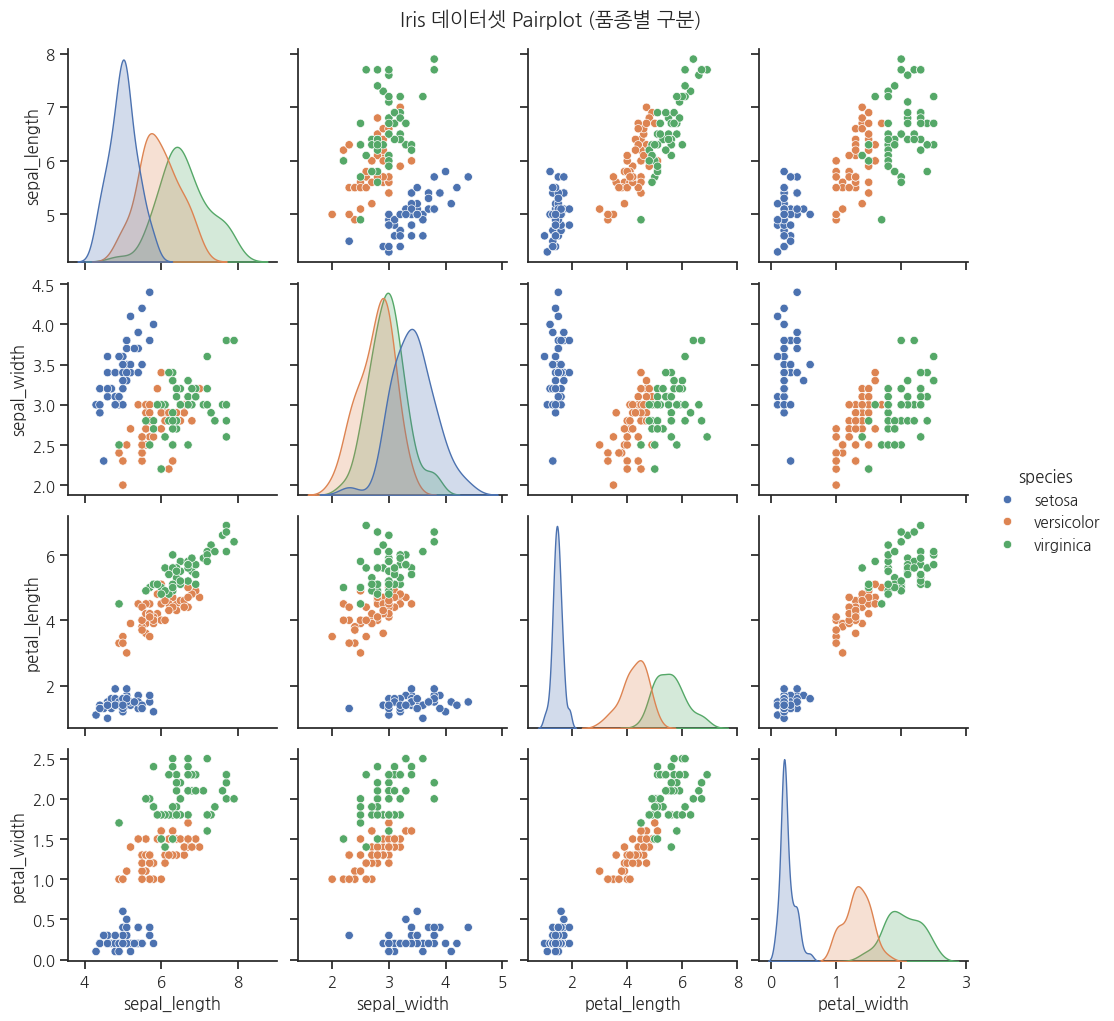

Pairplot 생성 완료.

각 특성별 히스토그램 생성 중...


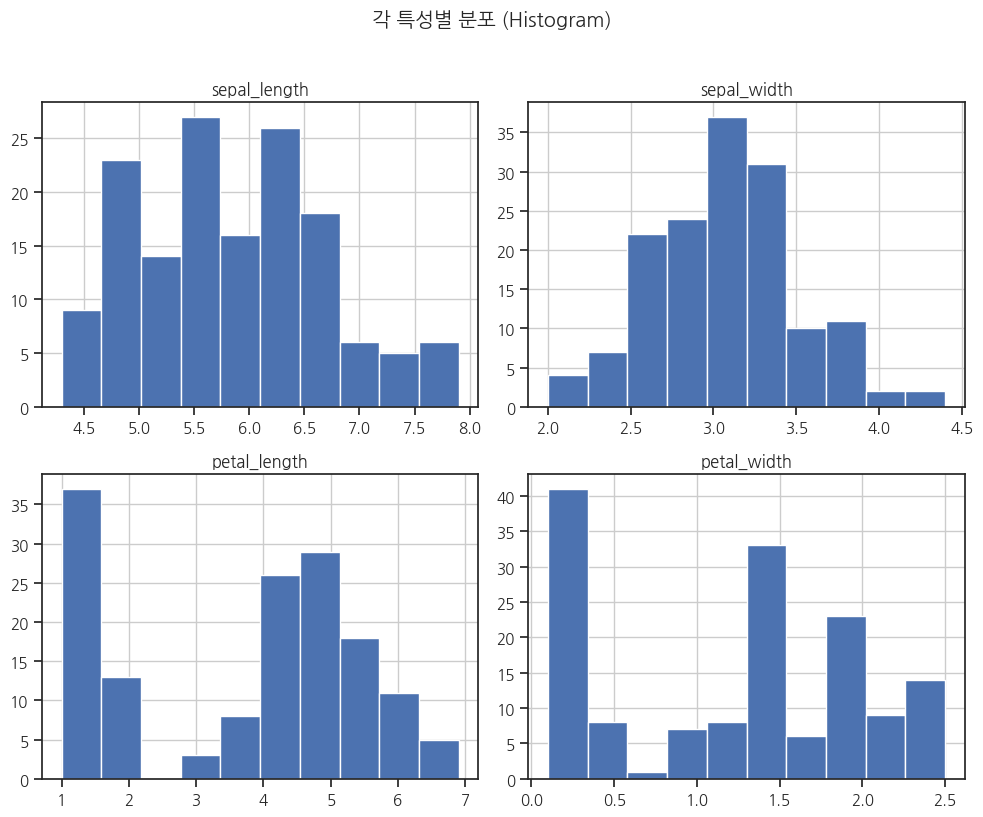

히스토그램 생성 완료.

품종별 Boxplot 생성 중...


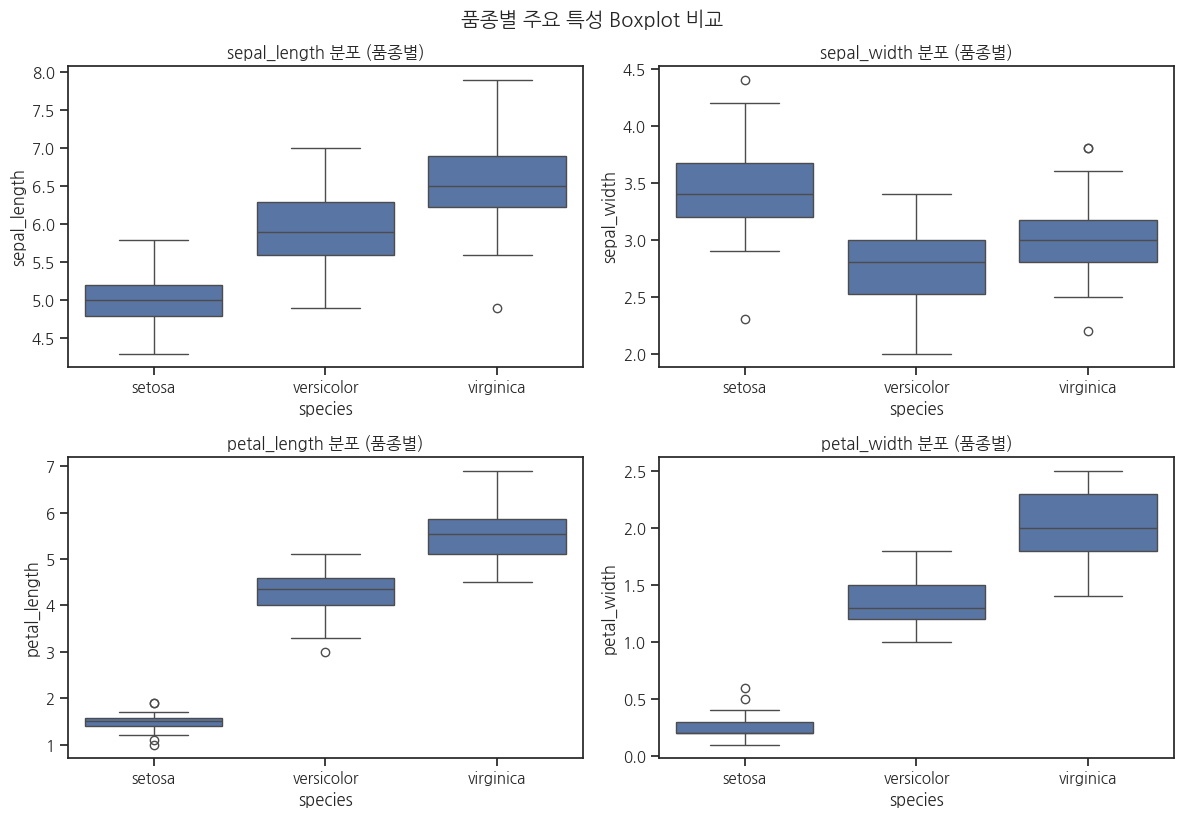

Boxplot 생성 완료.


In [4]:
# Pairplot: 변수 간 관계 및 품종별 분포 시각화
print("\nPairplot 생성 중...")
sns.pairplot(iris, hue='species')
plt.suptitle('Iris 데이터셋 Pairplot (품종별 구분)', y=1.02) # 제목 추가
plt.show()
print("Pairplot 생성 완료.")

# 각 특성별 히스토그램 시각화
print("\n각 특성별 히스토그램 생성 중...")
iris.hist(figsize=(10, 8)) # 전체 그림 크기 조절
plt.suptitle('각 특성별 분포 (Histogram)', y=1.02)
plt.tight_layout() # 그래프 간격 자동 조절
plt.show()
print("히스토그램 생성 완료.")

# 품종별 각 특성 분포 Boxplot 시각화
print("\n품종별 Boxplot 생성 중...")
plt.figure(figsize=(12, 8)) # 새 Figure 생성 및 크기 조절
for i, feature in enumerate(iris.columns[:-1]): # 마지막 'species' 컬럼 제외
    plt.subplot(2, 2, i+1) # 2x2 그리드에 순서대로 그래프 추가
    sns.boxplot(x='species', y=feature, data=iris)
    plt.title(f'{feature} 분포 (품종별)')
plt.tight_layout()
plt.suptitle('품종별 주요 특성 Boxplot 비교', y=1.02)
plt.show()
print("Boxplot 생성 완료.")


### 테이블 데이터 시각화 (Pandas Styling)

데이터프레임 자체를 시각적으로 개선하여 보여줍니다. 상위 10개 도서관 데이터를 중심으로 장서 수에 따른 배경색 변화와 연간 방문자 수 최댓값을 강조하여 표시합니다.

In [7]:
# Iris 데이터셋 테이블 시각화 (Pandas Styling)
from IPython.display import display

# 데이터 샘플링 (시각화를 위해 처음 10개 행 사용)
iris_sample = iris.head(10)

# Pandas의 스타일링 기능을 사용한 시각화
# 배경색 그라데이션 스타일링 (꽃잎과 꽃받침 길이에 적용)
styled_iris = iris_sample.style\
    .background_gradient(subset=['sepal_length', 'petal_length'], cmap='viridis')\
    .set_caption('붓꽃(Iris) 데이터셋 시각화 테이블 (상위 10개 샘플)')\
    .format('{:.2f}', subset=pd.IndexSlice[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]) # 수치형 데이터 소수점 2자리

# 스타일이 적용된 데이터프레임 출력
print("스타일링된 Iris 데이터 테이블 (상위 10개):")
display(styled_iris)

스타일링된 Iris 데이터 테이블 (상위 10개):


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
5,5.40,3.90,1.70,0.40,setosa
6,4.60,3.40,1.40,0.30,setosa
7,5.00,3.40,1.50,0.20,setosa
8,4.40,2.90,1.40,0.20,setosa
9,4.90,3.10,1.50,0.10,setosa


In [6]:
# Iris 데이터셋의 테이블 시각화 (Pandas Styling)
from IPython.display import display

# 데이터 샘플링 (시각화를 위해 처음 10개 행 사용)
iris_sample = iris.head(10)

# Pandas의 스타일링 기능을 사용한 시각화
def highlight_max(s):
    """
    각 열(컬럼)에서 최대값을 시각적으로 강조합니다.
    
    Parameters:
    -----------
    s : pandas.Series
        스타일을 적용할 데이터가 포함된 Series
        
    Returns:
    --------
    list
        각 값에 적용할 CSS 스타일 목록
    """
    # 문자열 데이터인 경우 강조하지 않음
    if s.dtype == object:
        return ['' for _ in range(len(s))]
    
    # 최대값 찾기
    is_max = s == s.max()
    
    # 최대값에 스타일 적용
    return ['background-color: yellow; color: red' if v else '' for v in is_max]

# 배경색 그라데이션 스타일링 (꽃잎과 꽃받침 길이에 적용)
styled_iris = iris_sample.style\
    .background_gradient(subset=['sepal_length', 'sepal_width'], cmap='Blues')\
    .background_gradient(subset=['petal_length', 'petal_width'], cmap='Greens')\
    .apply(highlight_max)\
    .set_caption('붓꽃(Iris) 데이터셋 시각화 테이블 (상위 10개 샘플)')\
    .format(precision=2)  # 소수점 두 자리까지 표시

# 스타일이 적용된 데이터프레임 출력
display(styled_iris)

print("\n")

# 품종별 특성 통계 요약 테이블 생성
species_stats = iris.groupby('species').describe().round(2)

# 계층적 인덱스를 다루기 위한 준비 (MultiIndex)
species_stats.columns = [f'{col[0]}_{col[1]}' for col in species_stats.columns]

# 필요한 통계량 선택 (평균, 최대, 최소, 표준편차)
selected_stats = ['sepal_length_mean', 'sepal_width_mean', 
                  'petal_length_mean', 'petal_width_mean',
                  'sepal_length_max', 'petal_length_max']

species_summary = species_stats[selected_stats]

# 요약 테이블 스타일링
styled_summary = species_summary.style\
    .background_gradient(cmap='viridis')\
    .highlight_max(axis=0, color='gold')\
    .set_caption('품종별 주요 특성 통계 요약')\
    .format(precision=2)

display(styled_summary)

# 막대 그래프 스타일 시각화 (Bar chart style)
# 각 품종별 꽃잎 길이 평균을 시각화
species_means = iris.groupby('species').mean().reset_index()
bar_data = species_means.set_index('species')

styled_bars = bar_data.style\
    .bar(subset=['petal_length'], color='#5fba7d')\
    .bar(subset=['sepal_length'], color='#5f9bba')\
    .set_caption('품종별 꽃잎과 꽃받침 길이 (막대 그래프 스타일)')\
    .format(precision=2)

display(styled_bars)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
5,5.40,3.90,1.70,0.40,setosa
6,4.60,3.40,1.40,0.30,setosa
7,5.00,3.40,1.50,0.20,setosa
8,4.40,2.90,1.40,0.20,setosa
9,4.90,3.10,1.50,0.10,setosa


,sepal_length_mean,sepal_width_mean,petal_length_mean,petal_width_mean,sepal_length_max,petal_length_max
species,,,,,,
setosa,5.01,3.43,1.46,0.25,5.80,1.90
versicolor,5.94,2.77,4.26,1.33,7.00,5.10
virginica,6.59,2.97,5.55,2.03,7.90,6.90


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.01,3.43,1.46,0.25
versicolor,5.94,2.77,4.26,1.33
virginica,6.59,2.97,5.55,2.03


## 3. 다음 단계 제안

기본적인 데이터 로드, 탐색, 시각화가 완료되었습니다. 다음 단계로는 아래와 같은 분석을 진행해 볼 수 있습니다.

*   **상관관계 분석:** 히트맵(heatmap)을 사용하여 변수 간의 상관관계를 시각화합니다.
*   **고급 시각화:** Violin plot, Swarm plot 등 더 다양한 Seaborn 그래프를 활용하여 데이터의 특징을 더 깊이 탐색합니다.
*   **통계적 가설 검정:** 품종별 특성 차이에 대한 통계적 유의성을 검정합니다. (예: ANOVA)
*   **머신러닝 모델링:** 간단한 분류 모델(예: 로지스틱 회귀, 결정 트리)을 학습시켜 품종을 예측해 봅니다.

이 노트북을 기반으로 기능을 테스트하고 원하는 분석을 추가해 보세요!